# Week 9 Homework
## Sage Madden
## 11/18/2021

Let’s look at some real data from Mauna Loa to try to format and plot. These meteorological data from Mauna Loa were collected every minute for the year 2001. This dataset has 459,769 observations for 9 different metrics of wind, humidity, barometric pressure, air temperature, and precipitation. Download this dataset here. Save it to your data/ folder. Alternatively, you can read the CSV directly from the R-DAVIS Github: mloa <- read_csv("https://raw.githubusercontent.com/gge-ucd/R-DAVIS/master/data/mauna_loa_met_2001_minute.csv")

Use the README file associated with the Mauna Loa dataset to determine in what time zone the data are reported, and how missing values are reported in each column. With the mloa data.frame, remove observations with missing values in rel_humid, temp_C_2m, and windSpeed_m_s. Generate a column called “datetime” using the year, month, day, hour24, and min columns. Next, create a column called “datetimeLocal” that converts the datetime column to Pacific/Honolulu time (HINT: look at the lubridate function called with_tz()). Then, use dplyr to calculate the mean hourly temperature each month using the temp_C_2m column and the datetimeLocal columns. (HINT: Look at the lubridate functions called month() and hour()). Finally, make a ggplot scatterplot of the mean monthly temperature, with points colored by local hour.

In [1]:
# Import libraries
import pandas as pd
from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import datetime
import pytz

In [2]:
# Read in data
mloa = DplyFrame(pd.read_csv("https://raw.githubusercontent.com/gge-ucd/R-DAVIS/master/data/mauna_loa_met_2001_minute.csv"))
print(mloa.head)

<bound method NDFrame.head of                                         filename siteID  year  month  day  \
0       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
1       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
2       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
3       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
4       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
...                                          ...    ...   ...    ...  ...   
459764  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459765  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459766  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459767  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459768  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   

        hour24  min  windDir  windSpeed_m_s  

With the mloa data.frame, remove observations with missing values in rel_humid, temp_C_2m, and windSpeed_m_s.

In [3]:
# Remove missing values for rel_humid, temp_C_2m, and windSpeed_m_s.
mloa_filter = mloa >> sift((X.rel_humid != -99) & (X.temp_C_2m != -999.9) & (X.windSpeed_m_s != -99.9))
print(mloa_filter.head)

<bound method NDFrame.head of                                         filename siteID  year  month  day  \
0       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
1       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
2       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
3       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
4       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
...                                          ...    ...   ...    ...  ...   
459763  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459765  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459766  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459767  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459768  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   

        hour24  min  windDir  windSpeed_m_s  

Generate a column called “datetime” using the year, month, day, hour24, and min columns. 

In [5]:
# Here is the datatime column as a string 
cols = ["year", "month", "day", "hour24", "min"]
mloa_filter["combined"] = mloa_filter[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

print(mloa_filter["combined"].head)

<bound method NDFrame.head of 0             2001-1-1-0-0
1             2001-1-1-0-1
2             2001-1-1-0-2
3             2001-1-1-0-3
4             2001-1-1-0-4
                ...       
459763    2001-12-31-23-54
459765    2001-12-31-23-56
459766    2001-12-31-23-57
459767    2001-12-31-23-58
459768    2001-12-31-23-59
Name: combined, Length: 426437, dtype: object>


In [6]:
# Now I need to get it in a date format so that I can do a timezone conversion
# DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)
mloa_filter["datetime"] = ""

timezone = pytz.timezone("UTC")

for i in range(len(mloa_filter)):
    mloa_filter["datetime"].iloc[i] = datetime.datetime.strptime(mloa_filter["combined"].iloc[i], "%Y-%m-%d-%H-%M")
    mloa_filter["datetime"].iloc[i] = timezone.localize(mloa_filter["datetime"].iloc[i])

print(mloa_filter.head)

# This for loop takes FOREVER to run...why? Is it just because the dataset is large? Is there a more efficient way to do this?
# I can't use mutate and such because my columns are series and it throws errors

c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<bound method NDFrame.head of                                         filename siteID  year  month  day  \
0       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
1       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
2       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
3       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
4       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
...                                          ...    ...   ...    ...  ...   
459763  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459765  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459766  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459767  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459768  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   

        hour24  min  windDir  windSpeed_m_s  

Next, create a column called “datetimeLocal” that converts the datetime column to Pacific/Honolulu time (HINT: look at the lubridate function called with_tz())

In [11]:
pachon_tzinfo = pytz.timezone("Pacific/Honolulu")

mloa_filter["datetimeLocal"] = ""

for i in range(len(mloa_filter)):
    mloa_filter["datetimeLocal"].iloc[i] = mloa_filter["datetime"].iloc[i].astimezone(pachon_tzinfo)
    
print(mloa_filter.head)

c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<bound method NDFrame.head of                                         filename siteID  year  month  day  \
0       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
1       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
2       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
3       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
4       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001      1    1   
...                                          ...    ...   ...    ...  ...   
459763  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459765  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459766  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459767  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   
459768  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001     12   31   

        hour24  min  windDir  windSpeed_m_s  

Then, use dplyr to calculate the mean hourly temperature each month using the temp_C_2m column and the datetimeLocal columns. (HINT: Look at the lubridate functions called month() and hour()).

In [20]:
# Create columns with month and hour
mloa_filter["month_local"] = ""
mloa_filter["hour_local"] = ""


for i in range(len(mloa_filter)):
    mloa_filter["month_local"].iloc[i] = mloa_filter["datetimeLocal"].iloc[i].month
    mloa_filter["hour_local"].iloc[i] = mloa_filter["datetimeLocal"].iloc[i].hour


print(mloa_filter.head)
# mloa_summ = mloa_filter >> group_by(X.datetimeLocal.month, X.datetimeLocal.hour) >> summarize(mean_hourly_temp = mean(X.temp_C_2m))
# The above commented out code doesn't work because datetimeLocal is a series and I need to reference individual values within 
# it for .month to work, I think


c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<bound method NDFrame.head of                                         filename siteID  year month  day  \
0       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001    12    1   
1       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001    12    1   
2       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001    12    1   
3       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001    12    1   
4       met_mlo_insitu_1_obop_minute_2001_01.txt    MLO  2001    12    1   
...                                          ...    ...   ...   ...  ...   
459763  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001    12   31   
459765  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001    12   31   
459766  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001    12   31   
459767  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001    12   31   
459768  met_mlo_insitu_1_obop_minute_2001_12.txt    MLO  2001    12   31   

        hour24  min  windDir  windSpeed_m_s  windSteady  

In [21]:
# Use dplyr to get mean temps
mloa_summ = mloa_filter >> group_by(X.month, X.hour) >> summarize(mean_hourly_temp = X.temp_C_2m.mean())

print(mloa_summ.head)


<bound method NDFrame.head of      month  hour  mean_hourly_temp
0        1     0          3.981104
1        1     1          3.853628
2        1     2          3.378018
3        1     3          3.267188
4        1     4          3.243398
..     ...   ...               ...
283     12    19          5.887320
284     12    20          5.674758
285     12    21          5.500262
286     12    22          5.403400
287     12    23          5.322849

[288 rows x 3 columns]>


 Finally, make a ggplot scatterplot of the mean monthly temperature, with points colored by local hour.

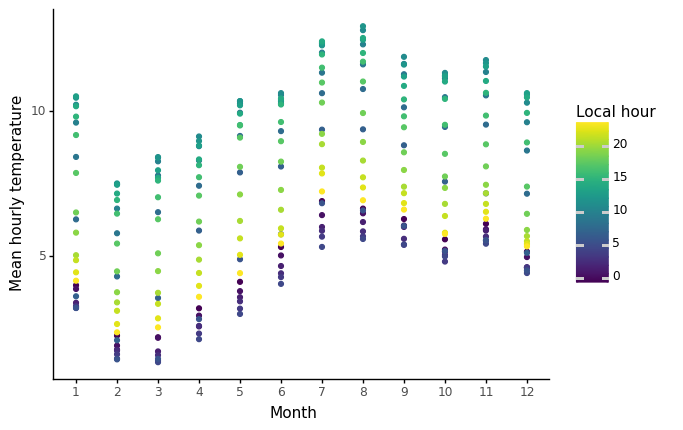

<ggplot: (-9223371886244562928)>

In [41]:
(p9.ggplot(data = mloa_summ,
           mapping = p9.aes(y = "mean_hourly_temp", x = "month", color = "hour")) 
 + p9.geom_point() 
 + p9.labs(x = "Month", y = "Mean hourly temperature", color = "Local hour") 
 + p9.theme_classic()
 + p9.scale_x_continuous(breaks = range(1, 13, 1))
)